# Homework 5

<b>Computing for Data Science <b> 

Master in Data Science for Decision Making
    
*Barcelona School of Economics*    

Group Members: 
- Diego Eslava
- Kalliopé Stassinos 
- Simón Caicedo

### Exercise 6

Finally, you are going to perform some data analysis on the data from “sample_diabetes_mellitus_data.csv”. Imagine you are in a project that tries to predict whether some patients have diabetes mellitus. In order to do so, you create a library that will be used for your team in order to perform the analysis and make predictions. Since you want your colleagues to make the code as understandable as possible (and earn the highest grade possible :) ), follow the best practices learnt during the lessons. Try to modularise the steps into functions (you can potentially merge g and h) and to separate the functions into files/folders in a way that makes the most sense to the team. For the purpose of this exercise, you are going to follow the next steps:

**a)** Load the data.

In [1]:
from hw5_library.load_data import load_diabetes_data
df = load_diabetes_data.read_data_diabetes()

In [2]:
df

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,ventilated_apache,wbc_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,0,214826,118,68.0,22.732803,0,Caucasian,M,180.30,Floor,...,0,14.1,0,0,0,0,0,0,0,1
1,1,246060,81,77.0,27.421875,0,Caucasian,F,160.00,Floor,...,1,12.7,0,0,0,0,0,0,0,1
2,2,276985,118,25.0,31.952749,0,Caucasian,F,172.70,Emergency Department,...,0,NaN,0,0,0,0,0,0,0,0
3,3,262220,118,81.0,22.635548,1,Caucasian,F,165.10,Operating Room,...,1,8.0,0,0,0,0,0,0,0,0
4,4,201746,33,19.0,NaN,0,Caucasian,M,188.00,NaN,...,0,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,167042,140,NaN,51.952814,0,Caucasian,F,137.20,Floor,...,0,7.0,0,0,0,0,0,0,0,0
9996,9996,165009,89,34.0,26.110113,0,Caucasian,F,175.26,Emergency Department,...,0,9.5,0,0,0,0,0,0,0,0
9997,9997,234052,137,30.0,23.774241,0,Native American,F,157.48,Emergency Department,...,0,NaN,0,0,0,0,0,0,0,0
9998,9998,249290,89,67.0,31.330708,0,Caucasian,F,157.48,Direct Admit,...,0,6.4,0,0,0,0,0,0,0,0


**b)** Split the data between train and test. (you can use train_test_split from sklearn or any other way)

In [3]:
from hw5_library.clean_data.split import train_test_split
X_train, X_test, y_train, y_test = train_test_split.split_df(df)

**c)** Remove those rows that contain NaN values in the columns: age, gender, ethnicity.

In [4]:
from hw5_library.clean_data.missing_values import remove_nan
X_train, y_train = remove_nan.remove_nan_age_gen_eth(X_train, y_train)
X_test, y_test  = remove_nan.remove_nan_age_gen_eth(X_test, y_test)

**d)** Fill NaN with the mean value of the column in the columns: height, weight.

In [5]:
from hw5_library.clean_data.missing_values import fill_nan

X_train= fill_nan.fill_nan_height_weight(X_train)
X_test = fill_nan.fill_nan_height_weight(X_test)

**e)** Generate dummies for ethnicity column (One hot encoding).

In [6]:
from hw5_library.clean_data.dummy_creation import dummy_creation

X_train = dummy_creation.dummy_creation(X_train, column = ["ethnicity"])
X_test = dummy_creation.dummy_creation(X_test, column = ["ethnicity"])

**f)** Create a binary variable for gender M/F.

In [7]:
X_train = dummy_creation.dummy_creation(X_train, column = ["gender"])
X_test = dummy_creation.dummy_creation(X_test, column = ["gender"])

**g)** Train a model (for instance LogisticRegression or RandomForestClassifier from sklearn) in the
train data. Use as features the columns: ‘age’, ‘height’, ‘weight’, ‘aids’, ‘cirrhosis’, ‘hepatic_failure’,
‘immunosuppression’, ‘leukemia’, ‘lymphoma’, ‘solid_tumor_with_metastasis’. Use as target the
column: ‘diabetes_mellitus’


**h)** Predict the targets for both the train and test sets and add the prediction as a new column (use predict_proba from the model to get the predicted probabilities) name the new column something like predictions.

In [8]:
from hw5_library.trainning_predictions import train_get_predictions

X_train, X_test = train_get_predictions.train_predictions_model(X_train, y_train, X_test)

C:\Users\USER\anaconda3\envs\virtualenv_hw5\lib\site-packages\hw5_library\trainning_predictions\train_get_predictions.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["predictions"] = probas_train[:,1]
C:\Users\USER\anaconda3\envs\virtualenv_hw5\lib\site-packages\hw5_library\trainning_predictions\train_get_predictions.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["predictions"] = probas_test[:,1]


**i)** Compute the train and test roc_auc metric using roc_auc_score from sklearn.

In [9]:
from hw5_library.metrics import roc_auc_score

score_train, score_test = roc_auc_score.train_test_roc_auc(X_train, y_train, X_test, y_test)

In [10]:
score_train

0.6736719438980764

In [11]:
score_test

0.6553416683823391

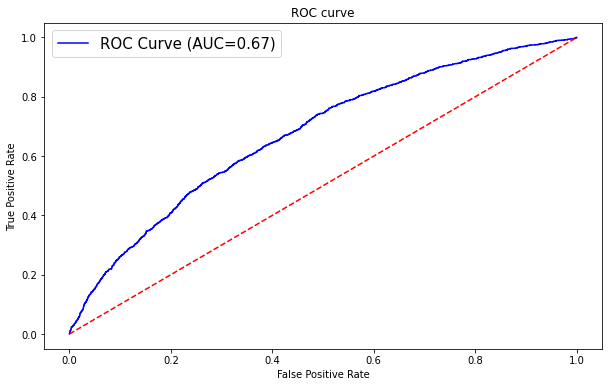

In [12]:
%matplotlib inline
from hw5_library.metrics import roc_auc_plot
roc_auc_plot.roc_auc_plot(X_train, y_train)

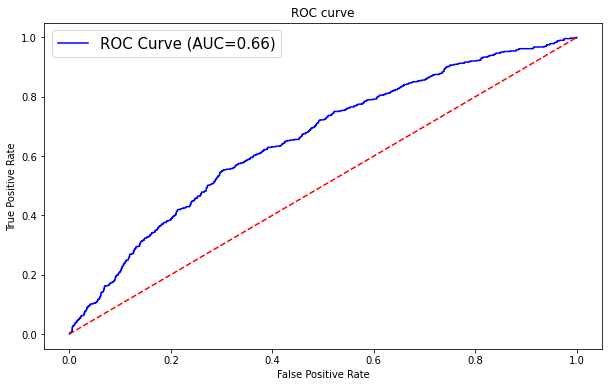

In [13]:
roc_auc_plot.roc_auc_plot(X_test, y_test)